**Презентация:**
https://disk.yandex.ru/d/5JiW7agHcsgNAg

# Выделение групп пользователей мобильного приложения на основе поведения

**Описание проекта**

Пользователи приложения "Ненужные вещи" совершают много действий в приложении. Нам нужно найти в этих данных инсайты, которые позволят стать лучшим приложением для продажи ненужных вещей.

**План исследования**

1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Сегментация пользователей
5. Ответы на основные вопросы
6. Проверка гипотез
7. Общий вывод

**Описание данных**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:
* `event.time` — время совершения
* `event.name` — название события
* `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
* `userId` — идентификатор пользователя
* `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
* `advert_open` — открытие карточки объявления
* `photos_show` — просмотр фотографий в объявлении
* `tips_show` — пользователь увидел рекомендованные объявления
* `tips_click` — пользователь кликнул по рекомендованному объявлению
* `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
* `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
* `map` — пользователь открыл карту размещенных объявлений
* `search_1` — `search_7` — разные события, связанные с поиском по сайту
* `favorites_add` — добавление объявления в избранное

## 1 Обзор данных 

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import datetime
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
import numpy as np
import math as mth

In [2]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
# выведем датасеты
display(mobile_sourсes)
display(mobile_dataset)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [4]:
# Переименуем столбцы
mobile_sourсes.rename(columns = {'userId' : 'user_id'}, inplace = True)
mobile_dataset.rename(columns = {'event.time' : 'event_time', 'event.name' : 'event_name', 'user.id' : 'user_id'}, inplace = True)

In [5]:
# Посмотрим общую информацию о датасетах
display(mobile_sourсes.info())
display(mobile_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4293 non-null   object
 1   source   4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

В датасетах имеются следующие данные: ID пользователя, время совершения события, название события, источник, с которого пользователь установил приложение. Мы переименовали столбцы, посмотрели общую информацию о датасетах. Было обнаружено, что пропусков в датасетах нет. 

## 2 Предобработка данных 

Было обнаружено, что пропусков у нас нет - сразу перейдем к поиску дубликатов.

In [6]:
# Проверим дубликаты
display(mobile_sourсes.duplicated().sum())
display(mobile_dataset.duplicated().sum())

0

0

Дубликатов не обнаружено

In [7]:
# Проверим уникальные значения в столбцах с источниками и названиями событий
display(mobile_sourсes['source'].unique())
display(mobile_dataset['event_name'].unique())

array(['other', 'yandex', 'google'], dtype=object)

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Было обнаружено, что просмотр контакта записан по-разному: 'contacts_show' и 'show_contacts'

In [8]:
# Заменим все 'show_contacts' на 'contacts_show'
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show')
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7'], dtype=object)

In [9]:
# Заменим тип данных в столбце event_time в datetime и избавимся от милисекунд
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']).astype('datetime64[s]')

In [10]:
mobile_dataset

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [11]:
# Проверим типы данных в датафрейме
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [12]:
# Проверим количество уникальных пользователей в обоих датасетах
display(len(mobile_dataset['user_id'].unique()))
display(len(mobile_sourсes['user_id'].unique()))

4293

4293

В исследовании мы будем иметь дело с 4293 пользователями

## 3 Исследовательский анализ данных

Рассчитаем следующие показатели:
* retention rate,
* время, проведённое в приложении,
* частота действий,
* конверсия в целевое действие — просмотр контактов.

### Retention rate

In [13]:
# Найдем время первой активности для каждого пользователя в приложении
mobile_dataset_pivot = mobile_dataset.pivot_table(index = 'user_id', values = 'event_time', aggfunc = 'min').reset_index()
mobile_dataset_pivot.rename(columns = {'event_time' : 'start'}, inplace = True)
mobile_dataset_pivot.head(5)

# Объединим таблицы по user_id
mobile_dataset_result = mobile_dataset.merge(
    mobile_dataset_pivot[['user_id', 'start']], on='user_id', how='left')

# Уберем в обеих датах время
mobile_dataset_result['event_time'] = pd.DatetimeIndex(mobile_dataset_result['event_time']).date
mobile_dataset_result['start'] = pd.DatetimeIndex(mobile_dataset_result['start']).date

# вычислим лайфтайм для каждой сессии в днях
mobile_dataset_result['lifetime'] = (
    mobile_dataset_result['event_time'] - mobile_dataset_result['start']).dt.days

mobile_dataset_result

,event_time,event_name,user_id,start,lifetime
0,2019-10-07,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,0
1,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,0
2,2019-10-07,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,0
3,2019-10-07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,0
4,2019-10-07,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,0
...,...,...,...,...,...
74192,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-10-16,18
74193,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-10-16,18
74194,2019-11-03,search_1,20850c8f-4135-4059-b13b-198d3ac59902,2019-10-27,7
74195,2019-11-03,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-10-16,18


In [14]:
# Напишем функцию для расчёта retention rate
def get_retention(
    dataset, observation_date, horizon_days
):

    # строим таблицу удержания
    retention = dataset.pivot_table(
        index=['start'], columns='lifetime', values='user_id', aggfunc='nunique'
    )

    # вычисляем размеры когорт
    cohort_sizes = (
        dataset.groupby('start')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )

    # объединяем размеры когорт и таблицу удержания
    retention = cohort_sizes.merge(
        retention, on='start', how='left'
    ).fillna(0)

    # Рассчитаем коэффициенты удержания, для этого поделим данные таблицы удержания на размеры когорт
    retention = retention.div(
        retention['cohort_size'], axis=0
    )

    # задаём момент и горизонт анализа данных
    observation_date = datetime(2019, 11, 3).date()
    horizon_days = 7

    # создаём опцию «игнорировать горизонт»
    ignore_horizon = False

    # рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )

    # исключаем пользователей, пришедших после максимальной даты привлечения
    retention = retention.query('start <= @last_suitable_acquisition_date')

    # исключаем из результата все лайфтаймы, превышающие горизонт анализа
    retention = retention[['cohort_size'] + list(range(horizon_days))]

    # во время деления все значения cohort_size превратились в единицу
    # восстанавливаем — они понадобятся нам позже
    retention['cohort_size'] = cohort_sizes

    return retention

In [15]:
retention = get_retention(
    mobile_dataset_result, datetime(2019, 10, 28).date(), 7
)

retention

,cohort_size,0,1,2,3,4,5,6
start,,,,,,,,
2019-10-07,204,1.0,0.181373,0.102941,0.107843,0.068627,0.058824,0.039216
2019-10-08,167,1.0,0.179641,0.119760,0.101796,0.035928,0.035928,0.065868
2019-10-09,176,1.0,0.096591,0.085227,0.056818,0.056818,0.079545,0.056818
2019-10-10,174,1.0,0.137931,0.074713,0.103448,0.074713,0.091954,0.063218
2019-10-11,136,1.0,0.088235,0.080882,0.132353,0.095588,0.066176,0.058824
2019-10-12,125,1.0,0.200000,0.120000,0.104000,0.064000,0.072000,0.104000
2019-10-13,148,1.0,0.175676,0.087838,0.054054,0.074324,0.060811,0.040541
2019-10-14,185,1.0,0.167568,0.091892,0.097297,0.102703,0.070270,0.054054
2019-10-15,186,1.0,0.150538,0.102151,0.091398,0.059140,0.053763,0.064516


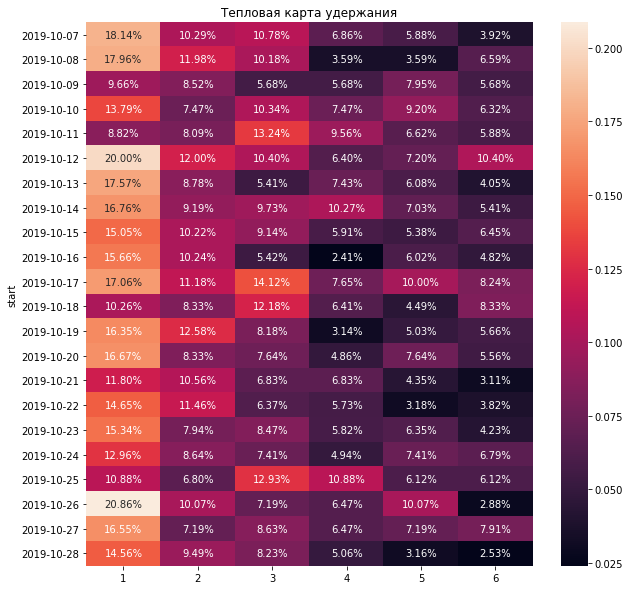

In [16]:
# строим хитмэп без нулевого лайфтайма
plt.figure(figsize=(10, 10))  # задаём размер графика
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

Лучшее удержание на второй день показали пользователи, привлечённые 12 и 26 октября, а на четвертый — привлечённые 17 октября. 
В целом, удержание во всех когортах не очень большое - на седьмой день остается максимум 10,4% пользователей. Меньше же всего пользователей на седьмой день осталось в когорте от 28 октября (2.53 %).

### Время, проведённое в приложении

In [17]:
# Добавим сортировку по пользователям и времени
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time']) 
mobile_dataset.head(5)

# Добавим в датафрейм день без времени для каждого пользователя
mobile_dataset['session_time'] = pd.DatetimeIndex(mobile_dataset['event_time']).date

# Добавим в датафрейм столбец min_time
mobile_dataset['min_time'] = mobile_dataset['event_time']

# Создадим сводную таблицу, в которой будет минимальное время для каждого дня пользователя в приложении
mobile_dataset_min_time = mobile_dataset.pivot_table(index = ['user_id', 'session_time'], values = 'min_time', aggfunc = 'min').reset_index()

# Добавим в датафрейм столбец max_time
mobile_dataset['max_time'] = mobile_dataset['event_time']

# Создадим сводную таблицу, в которой будет минимальное время для каждого дня пользователя в приложении
mobile_dataset_max_time = mobile_dataset.pivot_table(index = ['user_id', 'session_time'], values = 'max_time', aggfunc = 'max').reset_index()

# Объединим таблицы
mobile_dataset_time = mobile_dataset_min_time.merge(
    mobile_dataset_max_time[['max_time']], left_index=True, right_index=True)
mobile_dataset_time

,user_id,session_time,min_time,max_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45,2019-10-07 13:49:41
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,2019-10-09 18:33:55,2019-10-09 18:42:22
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,2019-10-21 19:52:30,2019-10-21 20:07:30
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,2019-10-22 11:18:14,2019-10-22 11:30:52
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,2019-10-19 21:34:33,2019-10-19 21:59:54
...,...,...,...,...
7812,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-29,2019-10-29 13:58:47,2019-10-29 16:13:00
7813,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-10-30,2019-10-30 00:15:43,2019-10-30 11:31:45
7814,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-01,2019-11-01 00:24:31,2019-11-01 00:24:53
7815,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-02,2019-11-02 01:16:48,2019-11-02 19:30:50


In [18]:
# Найдем время в приложении для каждой сессии и переведем в секунды
mobile_dataset_time['time'] = (mobile_dataset_time['max_time'] - mobile_dataset_time['min_time']).dt.seconds

# Найдем суммарное время для каждого пользователя, проведенного в приложении
mobile_dataset_time_sum = mobile_dataset_time.pivot_table(index = 'user_id', values = 'time', aggfunc = 'sum').reset_index().sort_values('time', ascending = False)
mobile_dataset_time_sum

,user_id,time
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,599574
401,1580911b-65db-4f1a-be7e-1ca39becac30,583976
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,468292
2952,b027f2d7-d9cb-4782-b410-4d100f5ef2f9,405841
3693,db9e4705-ca1b-44f2-b94e-821fb1387c5c,376253
...,...,...
3357,c9087b41-3e83-4551-ae77-7a107f992052,0
2377,8c80d63c-6b79-4fb5-b89c-2c72d614323d,0
1005,3ac69839-e9d8-4cef-8306-9076e6358619,0
2402,8dbb6266-63b2-489c-b0a6-66f317f76800,0


In [19]:
mobile_dataset_time_sum.describe()

,time
count,4293.000000
mean,9071.589564
std,28485.623895
min,0.000000
25%,440.000000
50%,1295.000000
75%,4823.000000
max,599574.000000


In [20]:
# Найдем среднюю длину сессии в минутах
(mobile_dataset_time_sum['time'] / (60 * 30)).mean()

5.039771980226208

In [21]:
# Посмотрим сколько у нас нулевых сессий
mobile_dataset_zero = mobile_dataset_time_sum.merge(mobile_dataset, on='user_id', how='left')
mobile_dataset_zero = mobile_dataset_zero.query('time == 0')
mobile_dataset_zero

,user_id,time,event_time,event_name,session_time,min_time,max_time
74075,5814d4d3-f979-4529-abe3-78db251f93b3,0,2019-10-24 14:34:12,map,2019-10-24,2019-10-24 14:34:12,2019-10-24 14:34:12
74076,61d27241-64d3-4af0-9671-253aea8c90ed,0,2019-10-14 21:22:35,search_5,2019-10-14,2019-10-14 21:22:35,2019-10-14 21:22:35
74077,55f7dc86-a03b-4cff-adc6-61a23d4ab680,0,2019-10-17 20:56:32,tips_show,2019-10-17,2019-10-17 20:56:32,2019-10-17 20:56:32
74078,552532d2-cf3b-4a1d-b6d9-e60e60e9c4e0,0,2019-10-25 08:18:19,tips_show,2019-10-25,2019-10-25 08:18:19,2019-10-25 08:18:19
74079,54d08ebb-99a9-43a8-9c12-5a36c6846bcf,0,2019-10-17 13:34:19,tips_show,2019-10-17,2019-10-17 13:34:19,2019-10-17 13:34:19
...,...,...,...,...,...,...,...
74192,c9087b41-3e83-4551-ae77-7a107f992052,0,2019-10-23 15:57:48,advert_open,2019-10-23,2019-10-23 15:57:48,2019-10-23 15:57:48
74193,8c80d63c-6b79-4fb5-b89c-2c72d614323d,0,2019-10-15 13:09:59,photos_show,2019-10-15,2019-10-15 13:09:59,2019-10-15 13:09:59
74194,3ac69839-e9d8-4cef-8306-9076e6358619,0,2019-10-13 23:01:27,search_1,2019-10-13,2019-10-13 23:01:27,2019-10-13 23:01:27
74195,8dbb6266-63b2-489c-b0a6-66f317f76800,0,2019-10-28 20:02:34,tips_show,2019-10-28,2019-10-28 20:02:34,2019-10-28 20:02:34


У нас 122 нулевые сессии

In [22]:
# Посмотрим, какие типы событий соответсвуют нулевым сессиям
mobile_dataset_zero['event_name'].unique()

array(['map', 'search_5', 'tips_show', 'contacts_show', 'photos_show',
       'search_1', 'favorites_add', 'search_7', 'advert_open'],
      dtype=object)

* Мы видим пользователя, который провел в приложении больше всего времени - около 7 суток за 4 недели. Это может быть связано с тем, что несколько дней он заходил утром и вечером, и мы посчитали это всё как одну сессию.
* Также, некоторые пользователи не провели в приложении ни секунды своего времени.
* Средняя длина сессии составляет 5 минут 30 секунд.
* Нулевым сессиям у нас соответсвуют следующие события: 'map', 'search_5', 'tips_show', 'contacts_show', 'photos_show', 'search_1', 'favorites_add', 'search_7', 'advert_open'. Скорее всего, это програмный сбой.

### Частота действий

In [23]:
# Создадим сводную таблицу, в которой будет дата и количество действий
mobile_dataset_actions = mobile_dataset.pivot_table(index = 'session_time', values = 'event_name', aggfunc = 'count').reset_index()
mobile_dataset_actions.head(5)

,session_time,event_name
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


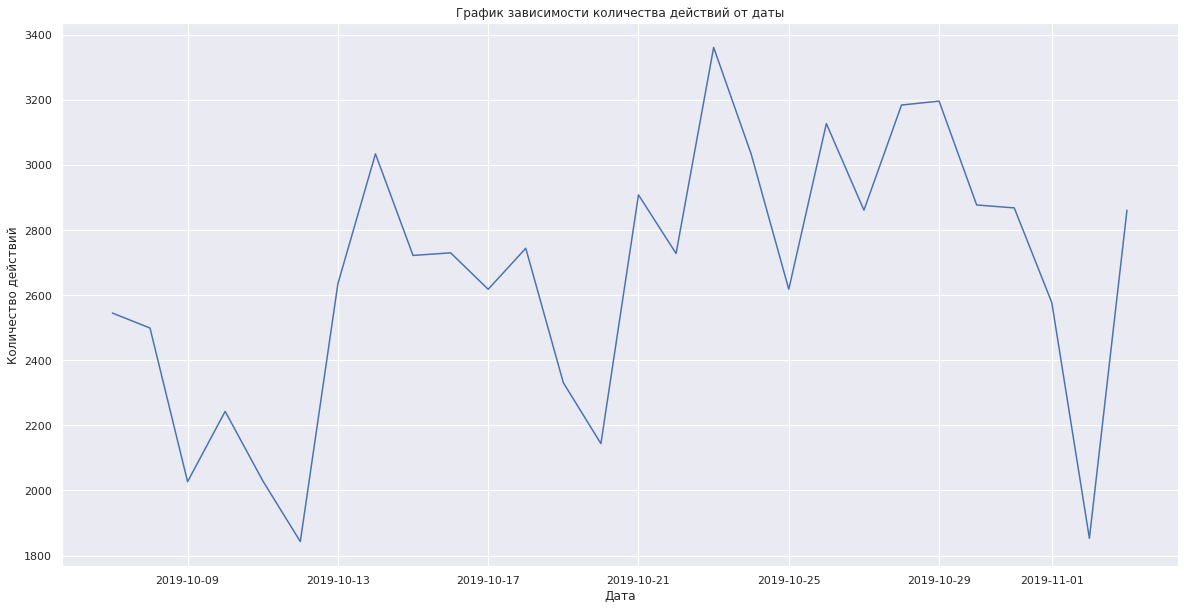

In [24]:
# Визуализируем данные 
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)
plt.title("График зависимости количества действий от даты")
ax = sns.lineplot(x="session_time", y="event_name", data=mobile_dataset_actions)
ax.set_xlabel("Дата")
ax.set_ylabel("Количество действий")
plt.show()

In [25]:
# Рассчитаем скользящее среднее за 7 дней
mobile_dataset_actions['7day_rolling_avg'] = mobile_dataset_actions.event_name.rolling(7).mean()
mobile_dataset_actions.tail(5)

,session_time,event_name,7day_rolling_avg
23,2019-10-30,2877,2985.142857
24,2019-10-31,2868,2961.571429
25,2019-11-01,2577,2955.714286
26,2019-11-02,1853,2773.714286
27,2019-11-03,2861,2773.714286


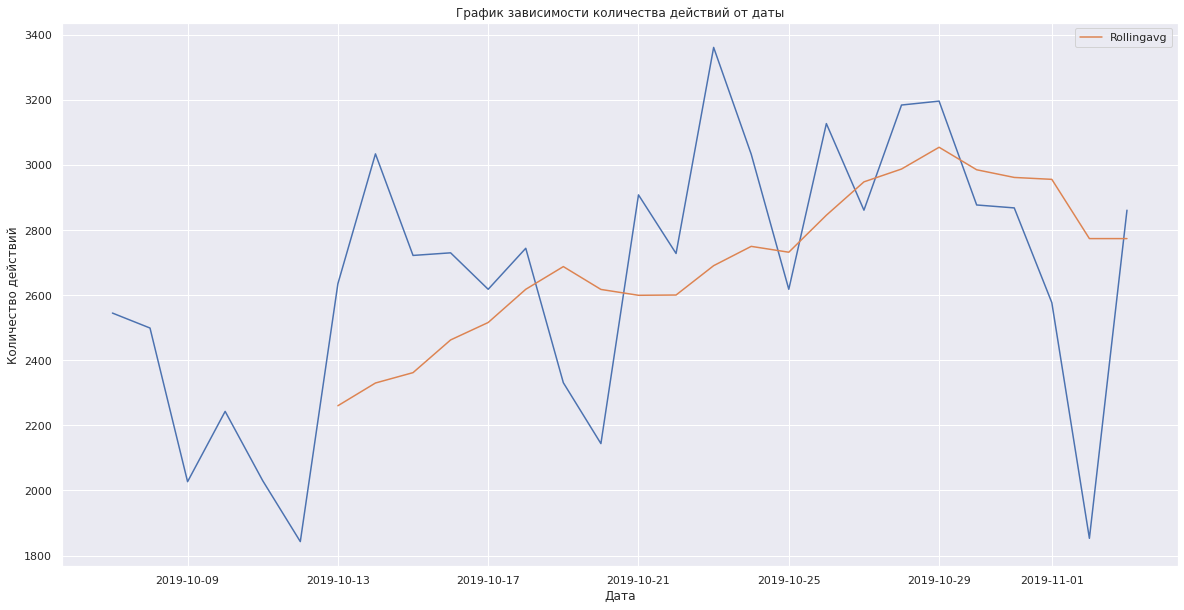

In [26]:
# Добавим скользящее среднее на график
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)
plt.title("График зависимости количества действий от даты")
ax = sns.lineplot(x="session_time", y="event_name", data=mobile_dataset_actions)
ax.set_xlabel("Дата")
ax.set_ylabel("Количество действий")


sns.lineplot(x = 'session_time',
             y = '7day_rolling_avg',
             data = mobile_dataset_actions,
             label = 'Rollingavg')

plt.show()

In [27]:
mobile_dataset_actions.describe()

,event_name,7day_rolling_avg
count,28.000000,22.000000
mean,2649.892857,2705.071429
std,408.950358,227.636787
min,1843.000000,2260.285714
25%,2457.000000,2599.785714
50%,2725.000000,2711.214286
75%,2884.750000,2922.392857
max,3361.000000,3054.285714


* В среднем, пользователи совершают 2650 действий в день.
* По графику мы можем заметить несколько спадов зачений (12 октября, 20 октября, 2 ноября) - все эти дни приходятся на выходные.
* Также мы можем увидеть максимальные значения (14 октября, 23 октября, 26 октября, 28 октября, 29 октября) - здесь никаких закономерностей не обнаружено.

### Конверсия в целевое действие — просмотр контактов

In [28]:
# Найдем уникальных пользователей, которые дошли до 'contacts_show'
mobile_dataset_contacts_show = mobile_dataset.query('event_name == "contacts_show"')
len(mobile_dataset_contacts_show['user_id'].unique())

# Найдем Конверсию
round(len(mobile_dataset_contacts_show['user_id'].unique()) / len(mobile_dataset['user_id'].unique()) * 100, 2)

22.85

Конверсия в нашем приложении составила 22.85%

**Вывод:** 

Мы рассчитали следующие показатели:
* retention rate,
* время, проведённое в приложении,
* частота действий,
* конверсия в целевое действие — просмотр контактов.

1. В целом, удержание во всех когортах не очень большое - на седьмой день остается максимум 10.4% пользователей. Меньше же всего пользователей на седьмой день осталось в когорте от 28 октября (2.53 %).
2. Средняя длина сессии составила 5 минут 30 секунд.
3. Были обнаружены некоторые пользователи, которые не провели в приложении ни секунды своего времени. Нулевым сессиям у нас соответсвуют следующие события: 'map', 'search_5', 'tips_show', 'contacts_show', 'photos_show', 'search_1', 'favorites_add', 'search_7', 'advert_open'. Скорее всего, это програмный сбой.
4. Среднее значение количества действий, которое пользователи совершают в приложении составило 2650 в день. По скользящему среднему мы заметили, что количество действий увеличивается.
5. Конверсия в нашем приложении составила 22.85%

## 4 Сегментация пользователей

In [29]:
# Посмотрим, какое количество пользователей заходит с каждого браузера (Yandex, Google, Other)
display(sum(mobile_sourсes['source'] == 'yandex'))
display(sum(mobile_sourсes['source'] == 'google'))
display(sum(mobile_sourсes['source'] == 'other'))

1934

1129

1230

Мы видим, что пользователей в первой группе больше, но в целом группы примерно одного размера и мы можем сегментировать пользователей по браузерам. Таким образом, мы сможем посмотреть как ведут себя пользователи разных групп и оптимизировать приложение под каждый браузер.

In [30]:
# Разделим датасет mobile_sourсes на три по браузерам
yandex = (mobile_sourсes[mobile_sourсes['source'] == 'yandex'])
google = (mobile_sourсes[mobile_sourсes['source'] == 'google'])
other = (mobile_sourсes[mobile_sourсes['source'] == 'other'])

# Объединим таблицы с mobile_dataset_result
yandex_data = mobile_dataset_result.merge(yandex, on='user_id', how='inner')
google_data = mobile_dataset_result.merge(google, on='user_id', how='inner')
other_data = mobile_dataset_result.merge(other, on='user_id', how='inner')

**Вывод:**
Мы сегментировали пользователей по браузерам, через которые они заходят в приложение и подготовили таблицы для дальнейших исследований. Группы получились примерно одного размера.

## 5 Ответы на основные вопросы

### 5.1 Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?


In [31]:
# Построим таблицу retention rate для yandex
retention_yandex = get_retention(
    yandex_data, datetime(2019, 11, 3).date(), 7
)

retention_yandex

,cohort_size,0,1,2,3,4,5,6
start,,,,,,,,
2019-10-07,90,1.0,0.200000,0.111111,0.133333,0.122222,0.044444,0.044444
2019-10-08,74,1.0,0.162162,0.094595,0.067568,0.027027,0.027027,0.054054
2019-10-09,83,1.0,0.108434,0.120482,0.060241,0.024096,0.048193,0.036145
2019-10-10,81,1.0,0.148148,0.098765,0.098765,0.086420,0.111111,0.049383
2019-10-11,70,1.0,0.114286,0.128571,0.128571,0.100000,0.128571,0.100000
2019-10-12,59,1.0,0.220339,0.118644,0.101695,0.050847,0.067797,0.050847
2019-10-13,81,1.0,0.197531,0.098765,0.074074,0.123457,0.074074,0.061728
2019-10-14,85,1.0,0.152941,0.082353,0.094118,0.082353,0.035294,0.035294
2019-10-15,86,1.0,0.186047,0.127907,0.081395,0.069767,0.081395,0.093023


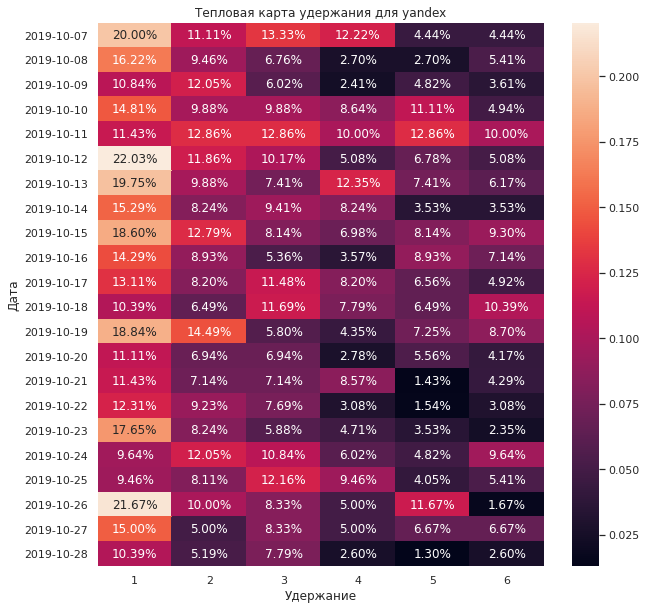

In [32]:
# строим хитмэп без нулевого лайфтайма для yandex
plt.figure(figsize=(10, 10))  # задаём размер графика
ax = sns.heatmap(
    retention_yandex.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
ax.set_xlabel("Удержание")
ax.set_ylabel("Дата")
plt.title('Тепловая карта удержания для yandex')  # название графика
plt.show()

Лучшее удержание на второй день у когорт от 26 октября и 12 октября (около 22%).

In [33]:
# Построим таблицу retention rate для google
retention_google = get_retention(
    google_data, datetime(2019, 11, 3).date(), 7
)

retention_google

,cohort_size,0,1,2,3,4,5,6
start,,,,,,,,
2019-10-07,56,1.0,0.178571,0.071429,0.053571,0.053571,0.053571,0.035714
2019-10-08,41,1.0,0.268293,0.195122,0.121951,0.024390,0.000000,0.048780
2019-10-09,45,1.0,0.044444,0.022222,0.066667,0.111111,0.088889,0.088889
2019-10-10,35,1.0,0.114286,0.057143,0.085714,0.028571,0.028571,0.085714
2019-10-11,38,1.0,0.026316,0.026316,0.078947,0.052632,0.000000,0.000000
2019-10-12,34,1.0,0.088235,0.088235,0.029412,0.088235,0.088235,0.147059
2019-10-13,35,1.0,0.200000,0.057143,0.000000,0.028571,0.028571,0.000000
2019-10-14,42,1.0,0.214286,0.071429,0.119048,0.142857,0.119048,0.047619
2019-10-15,48,1.0,0.125000,0.062500,0.104167,0.083333,0.041667,0.062500


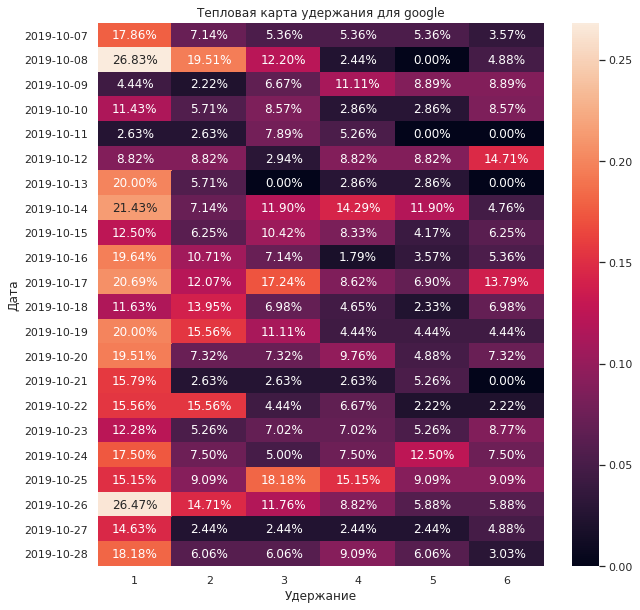

In [84]:
# строим хитмэп без нулевого лайфтайма для google
plt.figure(figsize=(10, 10))  # задаём размер графика
ax = sns.heatmap(
    retention_google.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
ax.set_xlabel("Удержание")
ax.set_ylabel("Дата")
plt.title('Тепловая карта удержания для google')  # название графика
plt.show()

Лучшее удержание на второй день у когорт от 8 октября и 26 октября (около 27%).

In [35]:
# Построим таблицу retention rate для other
retention_other = get_retention(
    other_data, datetime(2019, 11, 3).date(), 7
)

retention_other

,cohort_size,0,1,2,3,4,5,6
start,,,,,,,,
2019-10-07,58,1.0,0.155172,0.120690,0.120690,0.000000,0.086207,0.034483
2019-10-08,52,1.0,0.134615,0.096154,0.134615,0.057692,0.076923,0.096154
2019-10-09,48,1.0,0.125000,0.083333,0.041667,0.062500,0.125000,0.062500
2019-10-10,58,1.0,0.137931,0.051724,0.120690,0.086207,0.103448,0.068966
2019-10-11,28,1.0,0.107143,0.035714,0.214286,0.142857,0.000000,0.035714
2019-10-12,32,1.0,0.281250,0.156250,0.187500,0.062500,0.062500,0.156250
2019-10-13,32,1.0,0.093750,0.093750,0.062500,0.000000,0.062500,0.031250
2019-10-14,58,1.0,0.155172,0.120690,0.086207,0.103448,0.086207,0.086207
2019-10-15,52,1.0,0.115385,0.096154,0.096154,0.019231,0.019231,0.019231


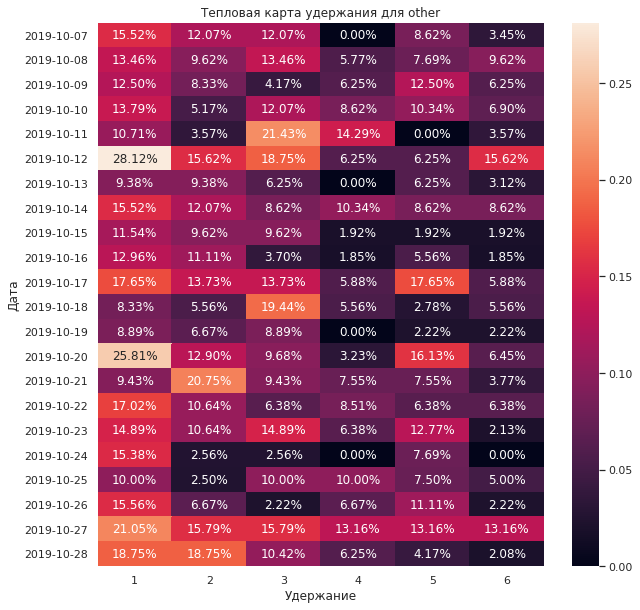

In [83]:
# строим хитмэп без нулевого лайфтайма для other
plt.figure(figsize=(10, 10))  # задаём размер графика
ax = sns.heatmap(
    retention_other.drop(columns=['cohort_size', 0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
ax.set_xlabel("Удержание")
ax.set_ylabel("Дата")
plt.title('Тепловая карта удержания для other')  # название графика
plt.show()

Лучшее удержание на второй день у когорт от 12 октября и 20 октября (около 28% и 26% соответственно).

По тепловым картам сравнивать retention rate сложно, поэтому найдем средние значения для каждого браузера во все лайфтаймы

In [37]:
# Транспонируем таблицы и рассчитаем средние значения удержания
avg_yandex = retention_yandex.T
avg_yandex['avg_yandex'] = avg_yandex.mean(axis=1)

avg_google = retention_google.T
avg_google['avg_google'] = avg_google.mean(axis=1)

avg_other = retention_other.T
avg_other['avg_other'] = avg_other.mean(axis=1)

# Объединим таблицы
avg_all = avg_yandex[['avg_yandex']].merge(
    avg_google[['avg_google']], left_index=True, right_index=True).merge(
    avg_other[['avg_other']], left_index=True, right_index=True)

# Удалим строки 'cohort_size' и retention rate в первый день, который равен 1
avg_all = avg_all.drop(labels=['cohort_size',0], axis=0)
avg_all

start,avg_yandex,avg_google,avg_other
1,0.147395,0.160445,0.148306
2,0.094607,0.085459,0.101686
3,0.087918,0.078762,0.106170
4,0.063518,0.068139,0.058397
5,0.059806,0.052588,0.080390
6,0.056134,0.059496,0.052630


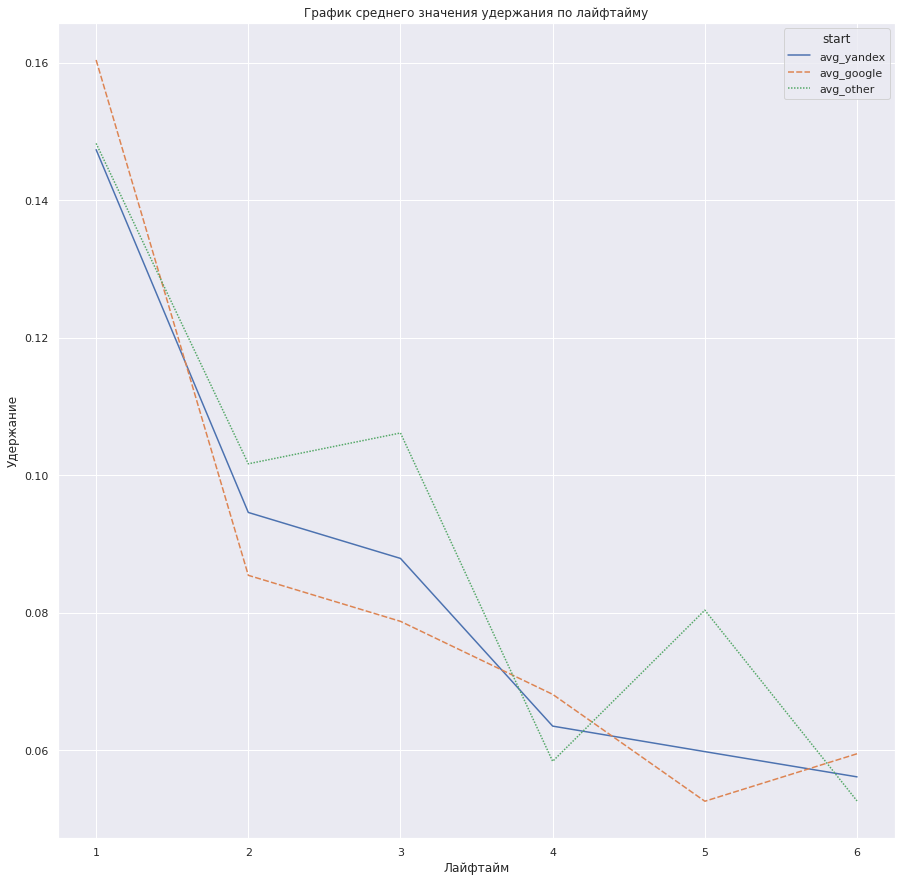

In [38]:
# Визуализируем срредние значения по retention rate по браузерам во все лайфтаймы, кроме первого
plt.rcParams['figure.figsize']=(15,15)
ax = sns.lineplot(data=avg_all)
plt.title('График среднего значения удержания по лайфтайму')
ax.set_xlabel("Лайфтайм")
ax.set_ylabel("Удержание")
plt.show()

По графику можно заметить, что на четвертый и шестой день retention rate для браузеров other больше, чем для google и yandex. Но к седьмому дню retention rate у этих браузеров наименьшая. В целом, удержание в нашем приложении не большое для всех групп пользователей - на второй день около 15%, а на последний - около 6%.

**Вывод:**
1. Мы рассчитали удержание для каждой группы и построили тепловые карты. По тепловым картам сложно сравнивать группы между собой, поэтому мы рассчитали средние удержания у каждой группы и построили график среднего значения удержания по лайфтайму.
2. По графику можно заметить, что на четвертый и шестой день retention rate для браузеров other больше, чем для google и yandex. Но к седьмому дню retention rate у этих браузеров наименьшая. В целом, удержание в нашем приложении не большое для всех групп пользователей - на второй день около 15%, а на последний - около 6%.

### 5.2 Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?


In [39]:
# Найдем уникальных пользователей, которые дошли до 'contacts_show' в yandex
mobile_dataset_contacts_show_yandex = yandex_data.query('event_name == "contacts_show"')
len(mobile_dataset_contacts_show_yandex['user_id'].unique())

# Найдем Конверсию
round(len(mobile_dataset_contacts_show_yandex['user_id'].unique()) / len(yandex_data['user_id'].unique()) * 100, 2)

24.72

In [40]:
# Найдем уникальных пользователей, которые дошли до 'contacts_show' в google
mobile_dataset_contacts_show_google = google_data.query('event_name == "contacts_show"')
len(mobile_dataset_contacts_show_google['user_id'].unique())

# Найдем Конверсию
round(len(mobile_dataset_contacts_show_google['user_id'].unique()) / len(google_data['user_id'].unique()) * 100, 2)

24.36

In [41]:
# Найдем уникальных пользователей, которые дошли до 'contacts_show' в other
mobile_dataset_contacts_show_other = other_data.query('event_name == "contacts_show"')
len(mobile_dataset_contacts_show_other['user_id'].unique())

# Найдем Конверсию
round(len(mobile_dataset_contacts_show_other['user_id'].unique()) / len(other_data['user_id'].unique()) * 100, 2)

18.54

**Вывод:**

**Конверсия в contacts_show для каждого браузера следующая:**
* yandex - 24.6%
* google - 24.73%
* other - 19.46%

## 6 Проверка гипотез

**Гипотеза 1: Группы пользователей, установивших приложение по ссылке из yandex и из google демонстрируют разную конверсию в просмотры контактов.**

* H0: У групп одинаковая конверсия
* H1: У групп конверсия не одинаковая

Проведем A/B тест

In [42]:
# Введем переменные 
cs_yandex = len(mobile_dataset_contacts_show_yandex['user_id'].unique())
all_yandex = len(yandex_data['user_id'].unique())

cs_google = len(mobile_dataset_contacts_show_google['user_id'].unique())
all_google = len(google_data['user_id'].unique())

alpha = .05 # критический уровень статистической значимости

successes = np.array([cs_yandex, cs_google])
trials = np.array([all_yandex, all_google])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Сравнили две группы пользователей, установивших приложение по ссылке из yandex и из google. Проверили гипотезу о том, что группы демонстрируют разную конверсию в просмотры контактов. Нулевая гипотеза - у групп одинаковая конверсия. Альтернативная гипотеза -  у групп конверсия не одинаковая. p-value получилось равным 0.82, не получилось отвергнуть нулевую гипотезу. Нет оснований считать конверсии разными.

**Гипотеза 2: Пользователи, которые проводят много времени в приложении и те, кто проводят мало демонстрируют разные конверсии в просмотры контактов.**

* H0: У групп одинаковая конверсия
* H1: У групп конверсия не одинаковая

Для начала - разделим пользователей на две группы: тех, кто провёл много времени в приложении (группа A) и тех, кто мало времени провел в приложении (группа B).

In [43]:
# Избавимся от тех пользователей, которые провели в приложении меньше минуты
mobile_dataset_time_sum = mobile_dataset_time_sum[mobile_dataset_time_sum['time'] > 60]

# Сбросим индекс
mobile_dataset_time_sum = mobile_dataset_time_sum.reset_index()
mobile_dataset_time_sum

,index,user_id,time
0,615,21230dd9-2f7f-4b77-a436-43d4d10388e0,599574
1,401,1580911b-65db-4f1a-be7e-1ca39becac30,583976
2,3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,468292
3,2952,b027f2d7-d9cb-4782-b410-4d100f5ef2f9,405841
4,3693,db9e4705-ca1b-44f2-b94e-821fb1387c5c,376253
...,...,...,...
4083,937,36d9a517-459d-4ec0-84ad-bbbf38fa123a,62
4084,2301,889db4da-0f3b-4ec0-8618-6a603a950cb0,62
4085,2291,881838ff-7a4b-467c-8b66-5f6ba163d62c,62
4086,2595,9a8f9420-40c4-4b3a-8208-ae206eca95c0,62


In [44]:
# Найдем медианное значение time
mobile_dataset_time_sum['time'].median()

1420.5

In [45]:
# По этому значению категоризируем пользователей на группы A и B
def group(value):
    if value >= 1420.5:
        return 'A'
    if value < 1420.5:
        return 'B' 

mobile_dataset_time_sum['group'] = mobile_dataset_time_sum['time'].apply(group)
mobile_dataset_time_sum

,index,user_id,time,group
0,615,21230dd9-2f7f-4b77-a436-43d4d10388e0,599574,A
1,401,1580911b-65db-4f1a-be7e-1ca39becac30,583976,A
2,3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,468292,A
3,2952,b027f2d7-d9cb-4782-b410-4d100f5ef2f9,405841,A
4,3693,db9e4705-ca1b-44f2-b94e-821fb1387c5c,376253,A
...,...,...,...,...
4083,937,36d9a517-459d-4ec0-84ad-bbbf38fa123a,62,B
4084,2301,889db4da-0f3b-4ec0-8618-6a603a950cb0,62,B
4085,2291,881838ff-7a4b-467c-8b66-5f6ba163d62c,62,B
4086,2595,9a8f9420-40c4-4b3a-8208-ae206eca95c0,62,B


In [46]:
# Объединим таблицу с mobile_dataset, чтобы указать event_name
mobile_dataset_group = mobile_dataset.merge(mobile_dataset_time_sum, on='user_id')

In [47]:
mobile_dataset_group

,event_time,event_name,user_id,session_time,min_time,max_time,index,time,group
0,2019-10-07 13:39:45,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:39:45,2019-10-07 13:39:45,0,2761,A
1,2019-10-07 13:40:31,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:40:31,2019-10-07 13:40:31,0,2761,A
2,2019-10-07 13:41:05,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:41:05,2019-10-07 13:41:05,0,2761,A
3,2019-10-07 13:43:20,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:43:20,2019-10-07 13:43:20,0,2761,A
4,2019-10-07 13:45:30,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,2019-10-07 13:45:30,2019-10-07 13:45:30,0,2761,A
...,...,...,...,...,...,...,...,...,...
73563,2019-11-03 15:51:23,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 15:51:23,2019-11-03 15:51:23,4292,237319,A
73564,2019-11-03 15:51:57,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 15:51:57,2019-11-03 15:51:57,4292,237319,A
73565,2019-11-03 16:07:40,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:07:40,2019-11-03 16:07:40,4292,237319,A
73566,2019-11-03 16:08:18,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,2019-11-03,2019-11-03 16:08:18,2019-11-03 16:08:18,4292,237319,A


In [48]:
# Найдем уникальных пользователей, которые дошли до 'contacts_show' в A
mobile_dataset_contacts_show_A = mobile_dataset_group.query('event_name == "contacts_show" and group == "A"')
print('Уникальных пользователей, которые дошли до contacts_show в группе A:', len(mobile_dataset_contacts_show_A['user_id'].unique()))

# Найдем уникальных пользователей, которые дошли до 'contacts_show' в B
mobile_dataset_contacts_show_B = mobile_dataset_group.query('event_name == "contacts_show" and group == "B"')
print('Уникальных пользователей, которые дошли до contacts_show в группе B :', len(mobile_dataset_contacts_show_B['user_id'].unique()))

# Найдем всех уникальных пользователей в A
mobile_dataset_all_A = mobile_dataset_group.query('group == "A"')
print('Уникальных пользователей в группе A:', len(mobile_dataset_all_A['user_id'].unique()))

# Найдем всех уникальных пользователей в B
mobile_dataset_all_B = mobile_dataset_group.query('group == "B"')
print('Уникальных пользователей в группе B:', len(mobile_dataset_all_B['user_id'].unique()))

Уникальных пользователей, которые дошли до contacts_show в группе A: 649
Уникальных пользователей, которые дошли до contacts_show в группе B : 306
Уникальных пользователей в группе A: 2044
Уникальных пользователей в группе B: 2044


Проведем A/B тест

In [49]:
# Введем переменные 
cs_A = len(mobile_dataset_contacts_show_A['user_id'].unique())
all_A = len(mobile_dataset_all_A['user_id'].unique())

cs_B = len(mobile_dataset_contacts_show_B['user_id'].unique())
all_B = len(mobile_dataset_all_B['user_id'].unique())

alpha = .05 # критический уровень статистической значимости

successes = np.array([cs_A, cs_B])
trials = np.array([all_A, all_B])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Сравнили две группы пользователей: те, которые проводят много времени в приложении и те, кто проводят мало. Проверили гипотезу о том, что группы демонстрируют разную конверсию в просмотры контактов. Нулевая гипотеза - у групп одинаковая конверсия. Альтернативная гипотеза - у групп конверсия не одинаковая. p-value получилось равным 0.0. Отвергаем нулевую гипотезу: между долями есть значимая разница.

## 7 Общий вывод

1. В датасетах имеются следующие данные: ID пользователя, время совершения события, название события, источник, с которого пользователь установил приложение. Мы переименовали столбцы, посмотрели общую информацию о датасетах. Было обнаружено, что пропусков в датасетах нет. Дубликатов не обнаружено.


2. Рассчитали следующие показатели:
* retention rate,
* время, проведённое в приложении,
* частота действий,
* конверсия в целевое действие — просмотр контактов.


3. Лучшее удержание на второй день показали пользователи, привлечённые 12 и 26 октября, а на четвертый — привлечённые 17 октября. В целом, удержание во всех когортах не очень большое - на седьмой день остается максимум 10,4% пользователей. Меньше же всего пользователей на седьмой день осталось в когорте от 28 октября (2.53 %).


4. В среднем, пользователи проводят в приложении 151 минуту за 4 недели, а это около 5 минут 30 секунд в день. Пользователь, который провел в приложении больше всего времени - около 7 суток за 4 недели. Это может быть связано с тем, что несколько дней он заходил утром и вечером, и мы посчитали это всё как одну сессию. Также, некоторые пользователи не провели в приложении ни секунды своего времени. Возможно, это програмный сбой.


5. В среднем, пользователи совершают 2650 действий в день. По графику мы заметили несколько спадов зачений (12 октября, 20 октября, 2 ноября) - все эти дни приходятся на выходные. Также мы увидели максимальные значения (14 октября, 23 октября, 26 октября, 28 октября, 29 октября) - здесь никаких закономерностей не обнаружено. По скользящему среднему мы заметили. что количество действий увеличивается.


6. Мы решили сегментировать пользователей по браузерам. Таким образом, мы сможем посмотреть как ведут себя пользователи разных групп и оптимизировать приложение под каждый браузер. 


7. По графику можно заметить, что на четвертый и шестой день retention rate для браузеров other больше, чем для google и yandex. Но к седьмому дню retention rate у этих браузеров наименьшая. В целом, удержание в нашем приложении не большое для всех групп пользователей - на второй день около 15%, а на последний - около 6%. Можно сделать вывод, что пользователи всех групп возвращаются в приложение одинаково.


8. Рассчитали конверсию в contacts_show для каждого браузера:
* yandex - 24.6%
* google - 24.73%
* other - 19.46%
Можем сделать вывод, что лучная конверсия у браузера google, затем с небольшим отрывом идет yandex и хуже всего конверсия у остальных браузеров.


9. Проверили гипотезу 1 : Группы пользователей, установивших приложение по ссылке из yandex и из google демонстрируют разную конверсию в просмотры контактов.
* p-значение:  0.82 
* Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


10. Проверили гипотезу 2: Пользователи, которые проводят много времени в приложении и те, кто проводят мало демонстрируют разные конверсии в просмотры контактов.
* p-значение:  0.0
* Отвергаем нулевую гипотезу: между долями есть значимая разница